In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Load** the three datasets of interest to then evaluate which dataset to use for the project

In [ ]:
# load the datasets - the files are loaded from my google drive (Valentin) and they will be loaded to your "Files" section

# 1. Shelter Animals Count (SAC)
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1voFzAGiCNOm_JihCmgLM-G-7_TKXESyo' -O Shelter_Animal_Count.csv

# 2. Long Beach Animal Shelter (LBAS)
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1fcXKPtcuMAV12GTUET3nlFBqvqN2cIPk' -O Long_Beach_Animal_Shelter.csv

# 3. Austin Animal Center (AAC)
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1TkTKl6ucCRlwo2s_4B8vWj8Vgd0pxaLy' -O Austin_Animal_Center.csv

--2024-05-01 02:28:52--  https://drive.google.com/uc?export=download&id=1voFzAGiCNOm_JihCmgLM-G-7_TKXESyo
Resolving drive.google.com (drive.google.com)... 108.177.125.138, 108.177.125.102, 108.177.125.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1voFzAGiCNOm_JihCmgLM-G-7_TKXESyo&export=download [following]
--2024-05-01 02:28:53--  https://drive.usercontent.google.com/download?id=1voFzAGiCNOm_JihCmgLM-G-7_TKXESyo&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.187.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515 (20K) [application/octet-stream]
Saving to: ‘Shelter_Animal_Count.csv’

Shelter_Animal_Coun 100%[===================>]  20.03

In [ ]:
# load the datasets - the files are loaded from my google drive (Valentin) and they will be loaded to your "Files" section

# 1. Shelter Animals Count (SAC)
sac_df = pd.read_csv('/content/Shelter_Animal_Count.csv')

# 2. Long Beach Animal Shelter (LBAS)
lb_df = pd.read_csv('/content/Long_Beach_Animal_Shelter.csv')

# 3. Austin Animal Center (AAC)
aa_df = pd.read_csv('/content/Austin_Animal_Center.csv')

## **Evaluate** the datasets to figure out which one to use as basis for our ML model

In [ ]:
# SAC
sac_df.info()

# columns = 31
# rows = 153

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   State                                                   153 non-null    object
 1   Year                                                    153 non-null    int64 
 2   Organizations                                           153 non-null    int64 
 3   Intake - Relinquished By Owner Total-Feline             153 non-null    int64 
 4   Intake - Stray At Large Total-Feline                    153 non-null    int64 
 5   Intake - Transferred In Total-Feline                    153 non-null    int64 
 6   Intake - Owner Intended Euthanasia Total-Feline         153 non-null    int64 
 7   Intakes - Other Intakes Total-Feline                    153 non-null    int64 
 8   Live Outcome - Adoption Total-Feline              

In [ ]:
# LBAS
lb_df.info()

# columns = 23
# rows = 27,199

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27199 entries, 0 to 27198
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Animal ID          27199 non-null  object 
 1   Animal Name        15705 non-null  object 
 2   Animal Type        27199 non-null  object 
 3   Primary Color      27199 non-null  object 
 4   Secondary Color    12936 non-null  object 
 5   Sex                27199 non-null  object 
 6   DOB                23851 non-null  object 
 7   Intake Date        27199 non-null  object 
 8   Intake Condition   27199 non-null  object 
 9   Intake Type        27199 non-null  object 
 10  Intake Subtype     26886 non-null  object 
 11  Reason for Intake  1866 non-null   object 
 12  Outcome Date       27029 non-null  object 
 13  Crossing           27199 non-null  object 
 14  Jurisdiction       27199 non-null  object 
 15  Outcome Type       27027 non-null  object 
 16  Outcome Subtype    239

In [ ]:
# AAC
aa_df.info()

# columns = 12
# rows = 161,368

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161369 entries, 0 to 161368
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         161369 non-null  object
 1   Name              115120 non-null  object
 2   DateTime          161369 non-null  object
 3   MonthYear         161369 non-null  object
 4   Date of Birth     161369 non-null  object
 5   Outcome Type      161334 non-null  object
 6   Outcome Subtype   74057 non-null   object
 7   Animal Type       161369 non-null  object
 8   Sex upon Outcome  161367 non-null  object
 9   Age upon Outcome  161362 non-null  object
 10  Breed             161369 non-null  object
 11  Color             161369 non-null  object
dtypes: object(12)
memory usage: 14.8+ MB


In [ ]:
# generate a data quality report (dqr)

def dqr(df):
    missing_values = df.isnull().sum()
    percent_missing = df.isnull().mean() * 100
    data_types = df.dtypes
    unique_values = df.nunique()
    quality_report = pd.DataFrame({
        "Missing Values": missing_values,
        "Percent Missing": percent_missing,
        "Data Type": data_types,
        "Number of Unique Values": unique_values
    })

    return quality_report

In [ ]:
report_sac = dqr(sac_df) # dqr for SAC

report_lb = dqr(lb_df) # dqr for LBAS

report_aa = dqr(aa_df) # dqr for AAC

In [ ]:
report_sac

,Missing Values,Percent Missing,Data Type,Number of Unique Values
State,0,0.0,object,51
Year,0,0.0,int64,3
Organizations,0,0.0,int64,31
Intake - Relinquished By Owner Total-Feline,0,0.0,int64,152
Intake - Stray At Large Total-Feline,0,0.0,int64,152
Intake - Transferred In Total-Feline,0,0.0,int64,147
Intake - Owner Intended Euthanasia Total-Feline,0,0.0,int64,118
Intakes - Other Intakes Total-Feline,0,0.0,int64,147
Live Outcome - Adoption Total-Feline,0,0.0,int64,152
Live Outcome - Returned To Owner Total-Feline,0,0.0,int64,140


In [ ]:
report_lb

,Missing Values,Percent Missing,Data Type,Number of Unique Values
Animal ID,0,0.000000,object,26296
Animal Name,11494,42.258907,object,8428
Animal Type,0,0.000000,object,10
Primary Color,0,0.000000,object,77
Secondary Color,14263,52.439428,object,41
Sex,0,0.000000,object,5
DOB,3348,12.309276,object,5376
Intake Date,0,0.000000,object,2625
Intake Condition,0,0.000000,object,16
Intake Type,0,0.000000,object,12


In [ ]:
report_aa

,Missing Values,Percent Missing,Data Type,Number of Unique Values
Animal ID,0,0.000000,object,144832
Name,46249,28.660399,object,28054
DateTime,0,0.000000,object,134659
MonthYear,0,0.000000,object,127
Date of Birth,0,0.000000,object,8304
Outcome Type,35,0.021689,object,11
Outcome Subtype,87312,54.107047,object,26
Animal Type,0,0.000000,object,5
Sex upon Outcome,2,0.001239,object,5
Age upon Outcome,7,0.004338,object,55


## **Conclusion:** Based on the exploration, we've decided to use the Austin Animal Center's dataset as it has (1) a high number of rows (i.e., 161,368) and (2) relevant features.
## We believe that a high number of records combined with relevant features is the best option for building a prediction model.

## **Data Cleaning**

In [ ]:
# save a copy of the original df

df = aa_df.copy()

# rerun the dqr to get a sense of the data
report_df = dqr(df) # dqr for AAC
report_df

,Missing Values,Percent Missing,Data Type,Number of Unique Values
Animal ID,0,0.000000,object,144832
Name,46249,28.660399,object,28054
DateTime,0,0.000000,object,134659
MonthYear,0,0.000000,object,127
Date of Birth,0,0.000000,object,8304
Outcome Type,35,0.021689,object,11
Outcome Subtype,87312,54.107047,object,26
Animal Type,0,0.000000,object,5
Sex upon Outcome,2,0.001239,object,5
Age upon Outcome,7,0.004338,object,55


In [ ]:
# descriptive stats
# all columns are non-numerical, so we could run aa_df.describe() to get the descriptive statistics. However, for the sake of best practices, we'll run the 'object' specific option

df.select_dtypes(include='object').describe(include='all')

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,161369,115120,161369,161369,161369,161334,74057,161369,161367,161362,161369,161369
unique,144832,28054,134659,127,8304,11,26,5,5,55,2923,642
top,A721033,Luna,4/18/16 0:00,Jun-19,5/1/16,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,705,39,2244,121,76876,38059,89077,56581,27049,33734,16809


In [ ]:
# handle missing values

# 1. "outcome type", "sex upon outcome", and "age upon outcome" had 35 (0.02%), 2 (0.001%), and 7 (0.004%) missing values, respectively = remove them
df.dropna(subset=['Outcome Type', 'Sex upon Outcome', 'Age upon Outcome'], inplace=True)

# 2. "name" and "outcome subtypes" had 28.6% and 54.1% missing values, respectively = remove the columns completely
df = df.drop(['Name', 'Outcome Subtype'], axis=1)

# confirm that they have been removed
report_df_missing_values = dqr(df)
report_df_missing_values

,Missing Values,Percent Missing,Data Type,Number of Unique Values
Animal ID,0,0.0,object,144797
DateTime,0,0.0,object,134626
MonthYear,0,0.0,object,127
Date of Birth,0,0.0,object,8301
Outcome Type,0,0.0,object,11
Animal Type,0,0.0,object,5
Sex upon Outcome,0,0.0,object,5
Age upon Outcome,0,0.0,object,55
Breed,0,0.0,object,2922
Color,0,0.0,object,641


In [ ]:
# drop irrelevant features

# animal id is just an identifier that doesn't serve any value in our model as it won't have any predictive power for our model
df = df.drop('Animal ID', axis=1)

In [ ]:
# feature engineering

# 1. calculate the animal's age at intake

# convert 'datetime' and 'date of birth' to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

# calculate age at outcome as days
df['Age at Outcome (days)'] = (df['DateTime'] - df['Date of Birth']).dt.days

# derive more features to potentially feed the model
df['Intake Month'] = df['DateTime'].dt.month # month
df['Intake Year'] = df['DateTime'].dt.year # year
df['Day of Week'] = df['DateTime'].dt.dayofweek  # Monday=0, Sunday=6
df['Day Name'] = df['DateTime'].dt.day_name()  # "Monday", "Tuesday", etc.

<ipython-input-56-8655ba33c8aa>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['DateTime'])
<ipython-input-56-8655ba33c8aa>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])


In [ ]:
df.head()

,DateTime,MonthYear,Date of Birth,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age at Outcome (days),Intake Month,Intake Year,Day of Week,Day Name
0,2019-05-08 18:20:00,May-19,2017-05-02,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,736,5,2019,2,Wednesday
1,2018-07-18 16:02:00,Jul-18,2017-07-12,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,371,7,2018,2,Wednesday
2,2020-08-16 11:38:00,Aug-20,2019-08-16,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,366,8,2020,6,Sunday
3,2016-02-13 17:59:00,Feb-16,2015-10-08,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,128,2,2016,5,Saturday
4,2014-03-18 11:47:00,Mar-14,2014-03-12,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,3,2014,1,Tuesday


In [ ]:
# one-hot encode the categorical features, except "Breed" and "Color" as they result in high dimensionality

# ohe
ohe_df = pd.get_dummies(df, columns=['Animal Type', 'Sex upon Outcome'])

#ohe_df = pd.get_dummies(df, columns=['Animal Type', 'Sex upon Outcome', 'Breed', 'Color'], prefix=['Type', 'Sex', 'Breed', 'Color'])

In [ ]:
# label encode 'Breed' and 'Color" as they have many unique values
# the random forest classifier can handle 'Breed' and 'Color' as label encoded features

from sklearn.preprocessing import LabelEncoder

# instantiate the encoders for each feature
label_encoder = LabelEncoder()

# Fit and transform the 'Breed' and 'Color' columns
ohe_df['Breed Encoded'] = label_encoder.fit_transform(df['Breed'])
ohe_df['Color Encoded'] = label_encoder.fit_transform(df['Color'])

In [ ]:
'''
# Determine threshold for grouping
breed_threshold = 100
color_threshold = 100

# Group less common breeds and colors
breed_counts = df['Breed'].value_counts()
color_counts = df['Color'].value_counts()

df['Breed Grouped'] = df['Breed'].where(df['Breed'].map(breed_counts) > breed_threshold, 'Other')
df['Color Grouped'] = df['Color'].where(df['Color'].map(color_counts) > color_threshold, 'Other')

# Now we apply one-hot encoding to the grouped fields
df = pd.get_dummies(df, columns=['Breed Grouped', 'Color Grouped'])

# Note: The original 'Breed' and 'Color' columns can be dropped if you decide they are no longer needed
'''

"\n# Determine threshold for grouping\nbreed_threshold = 100\ncolor_threshold = 100\n\n# Group less common breeds and colors\nbreed_counts = df['Breed'].value_counts()\ncolor_counts = df['Color'].value_counts()\n\ndf['Breed Grouped'] = df['Breed'].where(df['Breed'].map(breed_counts) > breed_threshold, 'Other')\ndf['Color Grouped'] = df['Color'].where(df['Color'].map(color_counts) > color_threshold, 'Other')\n\n# Now we apply one-hot encoding to the grouped fields\ndf = pd.get_dummies(df, columns=['Breed Grouped', 'Color Grouped'])\n\n# Note: The original 'Breed' and 'Color' columns can be dropped if you decide they are no longer needed\n"

In [ ]:
print(df.shape)
print(ohe_df.shape)
ohe_df.head()

(161326, 14)
(161326, 24)


,DateTime,MonthYear,Date of Birth,Outcome Type,Age upon Outcome,Breed,Color,Age at Outcome (days),Intake Month,Intake Year,...,Animal Type_Dog,Animal Type_Livestock,Animal Type_Other,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Breed Encoded,Color Encoded
0,2019-05-08 18:20:00,May-19,2017-05-02,Rto-Adopt,2 years,Domestic Shorthair Mix,Brown Tabby/White,736,5,2019,...,False,False,False,False,False,True,False,False,1292,188
1,2018-07-18 16:02:00,Jul-18,2017-07-12,Adoption,1 year,Chihuahua Shorthair Mix,White/Brown,371,7,2018,...,True,False,False,False,False,True,False,False,924,584
2,2020-08-16 11:38:00,Aug-20,2019-08-16,Euthanasia,1 year,Raccoon,Gray,366,8,2020,...,False,False,True,False,False,False,False,True,2407,326
3,2016-02-13 17:59:00,Feb-16,2015-10-08,Adoption,4 months,Anatol Shepherd/Labrador Retriever,Buff,128,2,2016,...,True,False,False,False,False,True,False,False,146,222
4,2014-03-18 11:47:00,Mar-14,2014-03-12,Transfer,6 days,Domestic Shorthair Mix,Orange Tabby,6,3,2014,...,False,False,False,False,True,False,False,False,1292,396


In [ ]:
# encode the y (i.e., 'outcome type') to fit the ML model

from sklearn.preprocessing import LabelEncoder

# instantiate the encoder
label_encoder = LabelEncoder()

# fit and transform the 'Outcome Type' column
ohe_df['Outcome Type Encoded'] = label_encoder.fit_transform(ohe_df['Outcome Type'])

# save the mapping of encoded classes (useful for interpretation later)
outcome_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

ohe_df.head()

# the "outcome type encoded" will be the y (target variable)

,DateTime,MonthYear,Date of Birth,Outcome Type,Age upon Outcome,Breed,Color,Age at Outcome (days),Intake Month,Intake Year,...,Animal Type_Livestock,Animal Type_Other,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Breed Encoded,Color Encoded,Outcome Type Encoded
0,2019-05-08 18:20:00,May-19,2017-05-02,Rto-Adopt,2 years,Domestic Shorthair Mix,Brown Tabby/White,736,5,2019,...,False,False,False,False,True,False,False,1292,188,8
1,2018-07-18 16:02:00,Jul-18,2017-07-12,Adoption,1 year,Chihuahua Shorthair Mix,White/Brown,371,7,2018,...,False,False,False,False,True,False,False,924,584,0
2,2020-08-16 11:38:00,Aug-20,2019-08-16,Euthanasia,1 year,Raccoon,Gray,366,8,2020,...,False,True,False,False,False,False,True,2407,326,3
3,2016-02-13 17:59:00,Feb-16,2015-10-08,Adoption,4 months,Anatol Shepherd/Labrador Retriever,Buff,128,2,2016,...,False,False,False,False,True,False,False,146,222,0
4,2014-03-18 11:47:00,Mar-14,2014-03-12,Transfer,6 days,Domestic Shorthair Mix,Orange Tabby,6,3,2014,...,False,False,False,True,False,False,False,1292,396,10


In [ ]:
# display the mapping of encoded classes
outcome_type_mapping

{'Adoption': 0,
 'Died': 1,
 'Disposal': 2,
 'Euthanasia': 3,
 'Lost': 4,
 'Missing': 5,
 'Relocate': 6,
 'Return to Owner': 7,
 'Rto-Adopt': 8,
 'Stolen': 9,
 'Transfer': 10}

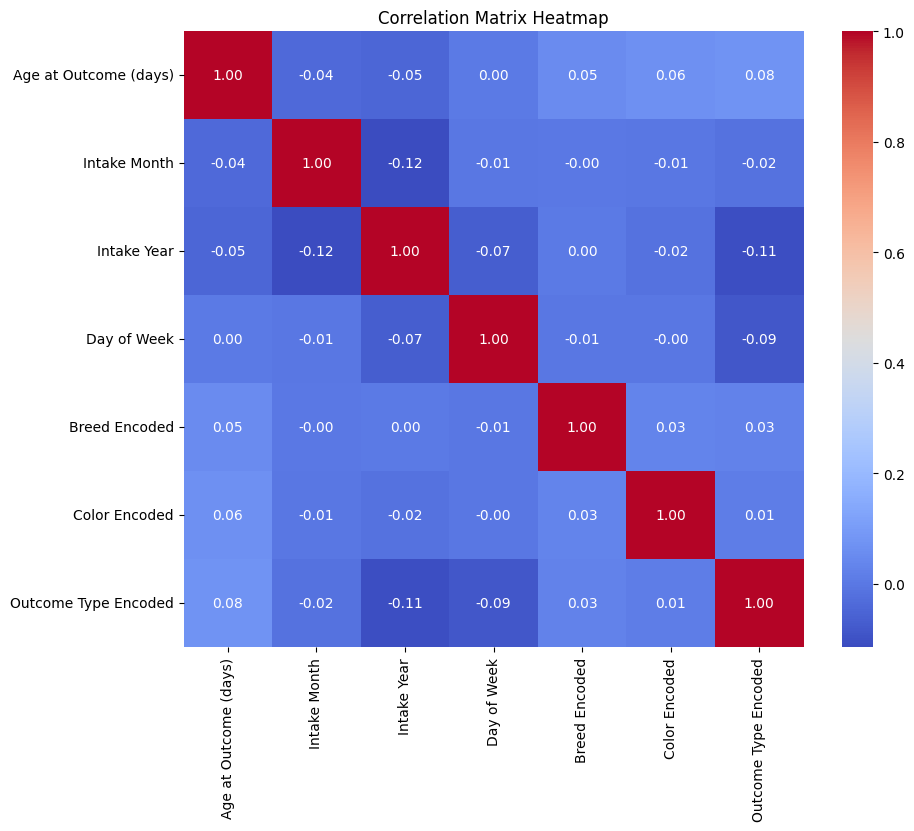

In [ ]:
# check for multicollinearity

# numeric columns only
numeric_df = ohe_df.select_dtypes(include=[np.number])

# calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# identify what non-numerical values to exclude from the model (e.g., we encoded outcome type, so don't need the original 'outcome type' anymore)
ohe_df.dtypes

# the following should be excluded from the model as they've been encoded: MonthYear, DateTime, Date of Birth, Outcome Type, Day Name, Age upon Outcome, Breed, and Color

DateTime                          datetime64[ns]
MonthYear                                 object
Date of Birth                     datetime64[ns]
Outcome Type                              object
Age upon Outcome                          object
Breed                                     object
Color                                     object
Age at Outcome (days)                      int64
Intake Month                               int32
Intake Year                                int32
Day of Week                                int32
Day Name                                  object
Animal Type_Bird                            bool
Animal Type_Cat                             bool
Animal Type_Dog                             bool
Animal Type_Livestock                       bool
Animal Type_Other                           bool
Sex upon Outcome_Intact Female              bool
Sex upon Outcome_Intact Male                bool
Sex upon Outcome_Neutered Male              bool
Sex upon Outcome_Spa

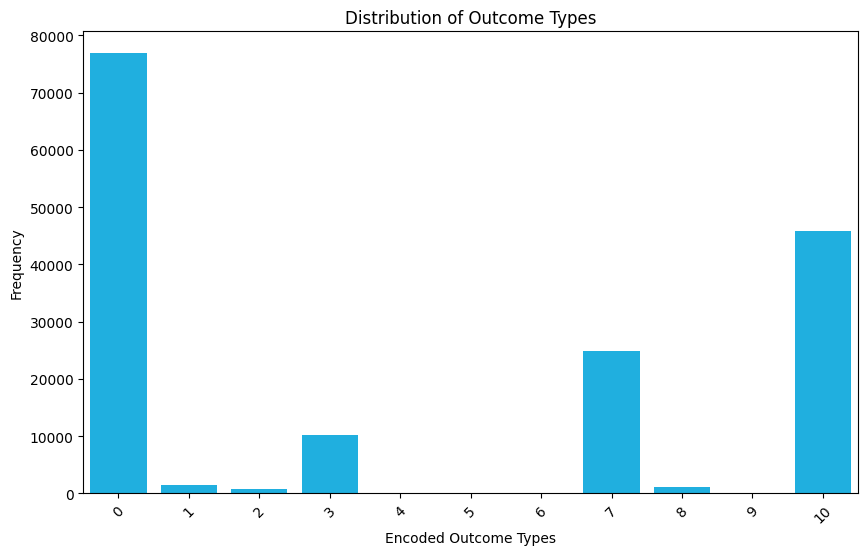

Encoded 'Outcome Types' mapping: {'Adoption': 0, 'Died': 1, 'Disposal': 2, 'Euthanasia': 3, 'Lost': 4, 'Missing': 5, 'Relocate': 6, 'Return to Owner': 7, 'Rto-Adopt': 8, 'Stolen': 9, 'Transfer': 10}


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ohe_df' is your DataFrame and 'Outcome Type Encoded' is your column of interest

# Count the frequency of each unique value
value_counts = ohe_df['Outcome Type Encoded'].value_counts()

# Create a bar plot to visualize the frequency of each unique value
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
sns.barplot(x=value_counts.index, y=value_counts.values, color='deepskyblue')  # Using a named color
plt.title('Distribution of Outcome Types')
plt.xlabel('Encoded Outcome Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels to improve readability if necessary
plt.show()

print("Encoded 'Outcome Types' mapping:",outcome_type_mapping)

## **Model 1: Random Forest Classifier**

### Model 1 Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# include the necessary features into X and set the y
X = ohe_df.drop(['Outcome Type', 'Outcome Type Encoded', 'DateTime', 'Date of Birth', 'MonthYear', 'Age upon Outcome', 'Breed', 'Color', 'Day Name'], axis=1) # features
y = ohe_df['Outcome Type Encoded']  # target

# split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# instantiate the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model
rf.fit(X_train, y_train)

# get feature importances
importances = rf.feature_importances_

# display feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
print(feature_importances.sort_values('Importance', ascending=False))

# feature importance:
# 1. Age at Outcome (days)
# 2. Color Encoded
# 3. Breed Encoded

                           Feature  Importance
0            Age at Outcome (days)    0.288471
15                   Color Encoded    0.118349
14                   Breed Encoded    0.112408
1                     Intake Month    0.089697
2                      Intake Year    0.080779
3                      Day of Week    0.065436
9   Sex upon Outcome_Intact Female    0.050255
10    Sex upon Outcome_Intact Male    0.043239
11  Sex upon Outcome_Neutered Male    0.035187
13        Sex upon Outcome_Unknown    0.032627
12  Sex upon Outcome_Spayed Female    0.028628
8                Animal Type_Other    0.025078
5                  Animal Type_Cat    0.014611
6                  Animal Type_Dog    0.013989
4                 Animal Type_Bird    0.001153
7            Animal Type_Livestock    0.000094


In [ ]:
y_test.value_counts()

Outcome Type Encoded
0     23084
10    13691
7      7438
3      3107
1       454
8       359
2       227
5        27
6         9
9         2
Name: count, dtype: int64

### Model 1 Evaluation

Accuracy: 0.73
Precision: 0.72
Recall: 0.73
F1 Score: 0.71

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82     23084
           1       0.38      0.04      0.08       454
           2       0.50      0.16      0.25       227
           3       0.81      0.57      0.67      3107
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00         9
           7       0.55      0.47      0.50      7438
           8       0.75      0.03      0.06       359
           9       0.00      0.00      0.00         2
          10       0.74      0.68      0.71     13691

    accuracy                           0.73     48398
   macro avg       0.45      0.28      0.31     48398
weighted avg       0.72      0.73      0.71     48398



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


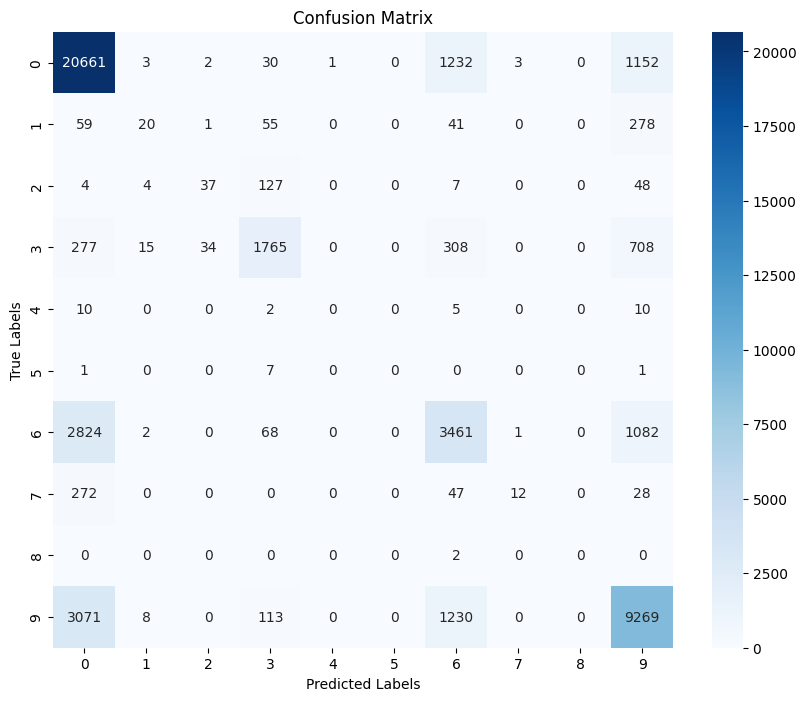

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

# predict on the test (unseen) data
y_pred = rf.predict(X_test)

# calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

# If 'y' is binary, calculate ROC-AUC score; if multi-class, skip or calculate it properly
roc_auc = None
if len(np.unique(y)) == 2:
    y_proba = rf.predict_proba(X_test)[:, 1]  # Probability of positive class
    roc_auc = roc_auc_score(y_test, y_proba)

# If the target variable is multi-class, you might want to calculate the ROC-AUC differently
# Here we'll skip ROC-AUC calculation for multi-class

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
if roc_auc:
    print(f"ROC-AUC Score: {roc_auc:.2f}")

# Print a classification report for detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **Refine the Model 1 by removing the "4" class (or lost) in the y variable (Outcome Type Encoded). If we don't remove it, then we can't calculate the ROC-AUC for multi-classes.**

In [ ]:
# the model can't calculate the ROC-AUC because y and y_test don't have the same amount of classes - it's because y only has 1 "4" (or "lost") value whereas y_test has none
print(y.value_counts())
y_test.value_counts()

Outcome Type Encoded
0     76876
10    45908
7     24798
3     10199
1      1510
8      1133
2       783
5        86
6        27
9         5
4         1
Name: count, dtype: int64


Outcome Type Encoded
0     23084
10    13691
7      7438
3      3107
1       454
8       359
2       227
5        27
6         9
9         2
Name: count, dtype: int64

Accuracy (filtered): 0.73
Precision (filtered): 0.72
Recall (filtered): 0.73
F1 Score (filtered): 0.72
ROC-AUC Score (filtered): 0.89

Classification Report (filtered):
               precision    recall  f1-score   support

           0       0.76      0.90      0.82     23074
           1       0.32      0.04      0.07       436
           2       0.52      0.14      0.22       232
           3       0.80      0.56      0.66      3026
           7       0.55      0.47      0.51      7364
           8       0.53      0.02      0.04       347
          10       0.74      0.67      0.71     13884

    accuracy                           0.73     48363
   macro avg       0.60      0.40      0.43     48363
weighted avg       0.72      0.73      0.72     48363



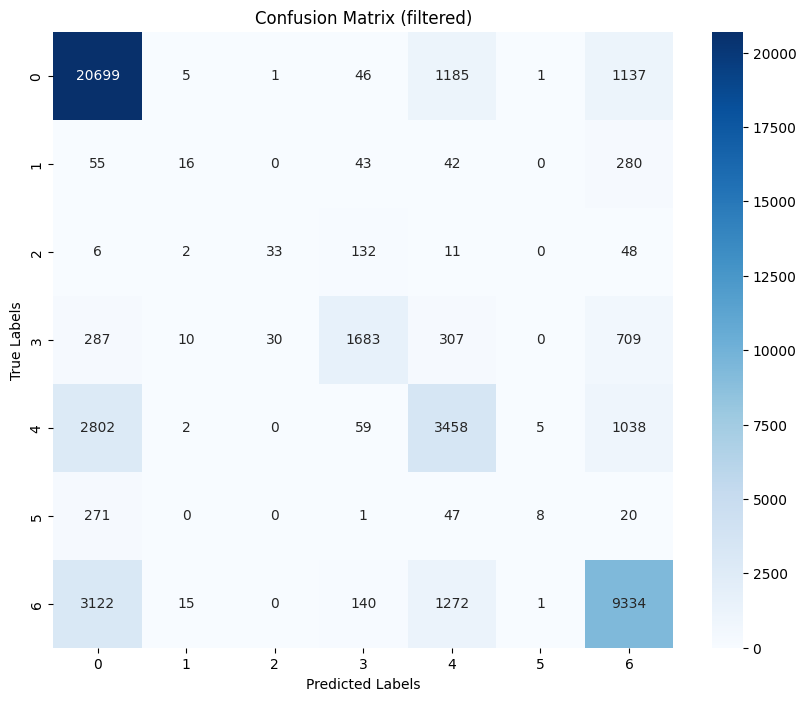

In [ ]:
# Remove instances of the sparse class '4'
# ohe_df_filtered = ohe_df[ohe_df['Outcome Type Encoded'] != 4]

# Remove instances of sparse classes '4', '5', '6', and '9' but can change it to the previous code with 4 only if this isn't the solutions
sparse_classes = [4, 5, 6, 9]
ohe_df_filtered = ohe_df[~ohe_df['Outcome Type Encoded'].isin(sparse_classes)]

# Redefine X and y with the filtered DataFrame
X_filtered = ohe_df_filtered.drop(['Outcome Type', 'Outcome Type Encoded', 'DateTime', 'Date of Birth', 'MonthYear', 'Age upon Outcome', 'Breed', 'Color', 'Day Name'], axis=1)
y_filtered = ohe_df_filtered['Outcome Type Encoded']

# Perform the train-test split again
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

# Instantiate and train the RandomForestClassifier again
rf_filtered = RandomForestClassifier(n_estimators=100, random_state=42)
rf_filtered.fit(X_train_filtered, y_train_filtered)

# Proceed with evaluation as usual, your previous evaluation code goes here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Now, we use the filtered dataset and the retrained model to predict and evaluate
y_pred_filtered = rf_filtered.predict(X_test_filtered)
y_proba_filtered = rf_filtered.predict_proba(X_test_filtered)

# Calculate the evaluation metrics using the filtered predictions
accuracy_filtered = accuracy_score(y_test_filtered, y_pred_filtered)
precision_filtered = precision_score(y_test_filtered, y_pred_filtered, average='weighted', zero_division=0)
recall_filtered = recall_score(y_test_filtered, y_pred_filtered, average='weighted', zero_division=0)
f1_filtered = f1_score(y_test_filtered, y_pred_filtered, average='weighted')

# Binarize the output for all classes in the filtered dataset
y_test_binarized_filtered = label_binarize(y_test_filtered, classes=np.unique(y_filtered))

# Calculate the ROC-AUC score using a One-vs-Rest approach for the filtered data
roc_auc_filtered = roc_auc_score(y_test_binarized_filtered, y_proba_filtered, multi_class="ovr", average='weighted')

# Print the evaluation metrics for the filtered data
print(f"Accuracy (filtered): {accuracy_filtered:.2f}")
print(f"Precision (filtered): {precision_filtered:.2f}")
print(f"Recall (filtered): {recall_filtered:.2f}")
print(f"F1 Score (filtered): {f1_filtered:.2f}")
print(f"ROC-AUC Score (filtered): {roc_auc_filtered:.2f}")

# Print a classification report for detailed metrics using the filtered data
print("\nClassification Report (filtered):\n", classification_report(y_test_filtered, y_pred_filtered))

# Plot a confusion matrix for the filtered data
conf_matrix_filtered = confusion_matrix(y_test_filtered, y_pred_filtered)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_filtered, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (filtered)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

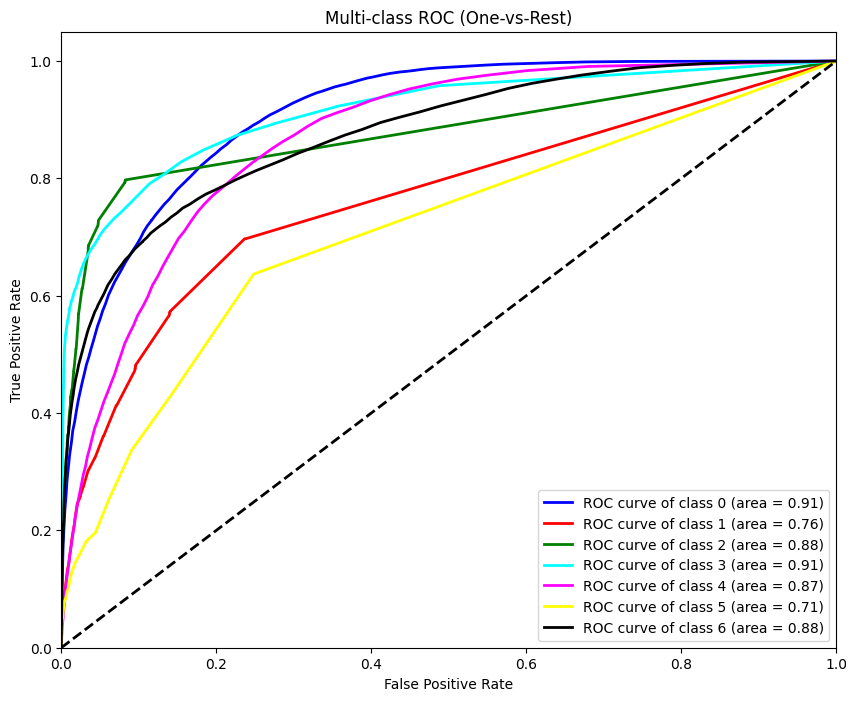

In [ ]:
# display the ROC curves

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Since y_test_filtered and y_proba_filtered are already defined, we can directly use them
# Binarize the output for all classes in the filtered dataset
y_test_binarized = label_binarize(y_test_filtered, classes=np.unique(y_filtered))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba_filtered[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = cycle(['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()


### **Adding SMOTE to RFCs**

Accuracy (filtered): 0.71
Precision (filtered): 0.71
Recall (filtered): 0.71
F1 Score (filtered): 0.71
ROC-AUC Score (filtered): 0.89

Classification Report (filtered):
               precision    recall  f1-score   support

           0       0.78      0.85      0.81     23074
           1       0.14      0.10      0.12       436
           2       0.23      0.27      0.25       232
           3       0.71      0.54      0.61      3026
           7       0.49      0.54      0.51      7364
           8       0.05      0.06      0.05       347
          10       0.75      0.64      0.69     13884

    accuracy                           0.71     48363
   macro avg       0.45      0.43      0.44     48363
weighted avg       0.71      0.71      0.71     48363



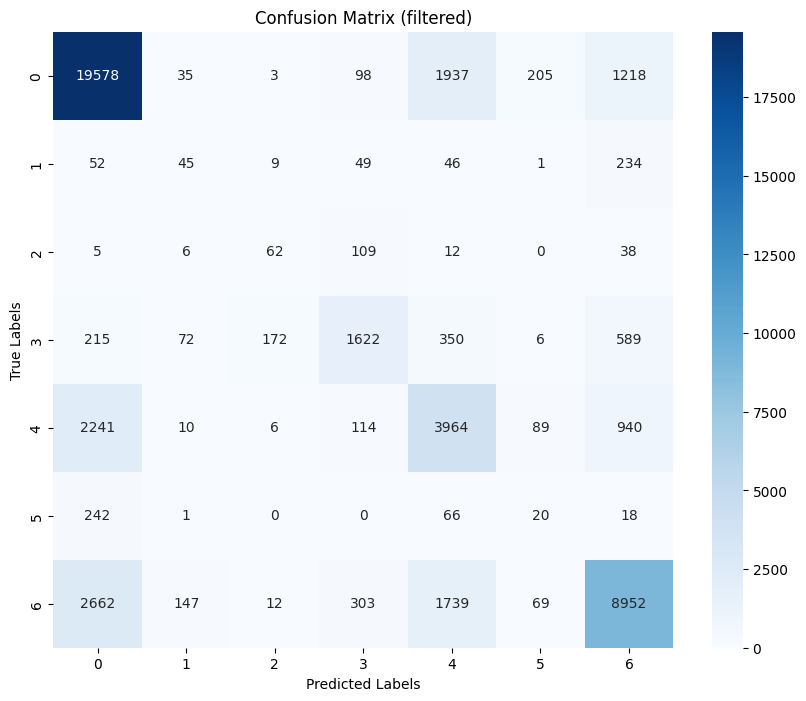

In [ ]:
# Remove instances of the sparse class '4'
# ohe_df_filtered = ohe_df[ohe_df['Outcome Type Encoded'] != 4]

# Remove instances of sparse classes '4', '5', '6', and '9' but can change it to the previous code with 4 only if this isn't the solutions
sparse_classes = [4, 5, 6, 9]
ohe_df_filtered = ohe_df[~ohe_df['Outcome Type Encoded'].isin(sparse_classes)]

# Redefine X and y with the filtered DataFrame
X_filtered = ohe_df_filtered.drop(['Outcome Type', 'Outcome Type Encoded', 'DateTime', 'Date of Birth', 'MonthYear', 'Age upon Outcome', 'Breed', 'Color', 'Day Name'], axis=1)
y_filtered = ohe_df_filtered['Outcome Type Encoded']

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already filtered out sparse classes and defined X_filtered, y_filtered
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.3, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_filtered, y_train_filtered)

# Train RandomForestClassifier on the oversampled data
rf_filtered = RandomForestClassifier(n_estimators=100, random_state=42)
rf_filtered.fit(X_train_smote, y_train_smote)

# Prediction and Evaluation
y_pred_filtered = rf_filtered.predict(X_test_filtered)
y_proba_filtered = rf_filtered.predict_proba(X_test_filtered)

# Evaluation Metrics
accuracy_filtered = accuracy_score(y_test_filtered, y_pred_filtered)
precision_filtered = precision_score(y_test_filtered, y_pred_filtered, average='weighted', zero_division=0)
recall_filtered = recall_score(y_test_filtered, y_pred_filtered, average='weighted', zero_division=0)
f1_filtered = f1_score(y_test_filtered, y_pred_filtered, average='weighted')
roc_auc_filtered = roc_auc_score(label_binarize(y_test_filtered, classes=np.unique(y_filtered)),
                                 y_proba_filtered, multi_class="ovr", average='weighted')

# Output results
print(f"Accuracy (filtered): {accuracy_filtered:.2f}")
print(f"Precision (filtered): {precision_filtered:.2f}")
print(f"Recall (filtered): {recall_filtered:.2f}")
print(f"F1 Score (filtered): {f1_filtered:.2f}")
print(f"ROC-AUC Score (filtered): {roc_auc_filtered:.2f}")
print("\nClassification Report (filtered):\n", classification_report(y_test_filtered, y_pred_filtered))

# Confusion Matrix
conf_matrix_filtered = confusion_matrix(y_test_filtered, y_pred_filtered)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_filtered, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (filtered)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
X_filtered.columns

Index(['Age at Outcome (days)', 'Intake Month', 'Intake Year', 'Day of Week',
       'Animal Type_Bird', 'Animal Type_Cat', 'Animal Type_Dog',
       'Animal Type_Livestock', 'Animal Type_Other',
       'Sex upon Outcome_Intact Female', 'Sex upon Outcome_Intact Male',
       'Sex upon Outcome_Neutered Male', 'Sex upon Outcome_Spayed Female',
       'Sex upon Outcome_Unknown', 'Breed Encoded', 'Color Encoded'],
      dtype='object')

## **Model 2: Gradient Boosting Classifier**

### Model 2 Building

Accuracy (GBM filtered): 0.73
Precision (GBM filtered): 0.72
Recall (GBM filtered): 0.73
F1 Score (GBM filtered): 0.72
ROC-AUC Score (GBM filtered): 0.89

Classification Report (GBM filtered):
               precision    recall  f1-score   support

           0       0.75      0.91      0.82     23074
           1       0.00      0.00      0.00       436
           2       0.91      0.04      0.08       232
           3       0.82      0.55      0.66      3026
           7       0.58      0.49      0.53      7364
           8       0.20      0.00      0.01       347
          10       0.74      0.66      0.70     13884

    accuracy                           0.73     48363
   macro avg       0.57      0.38      0.40     48363
weighted avg       0.72      0.73      0.72     48363



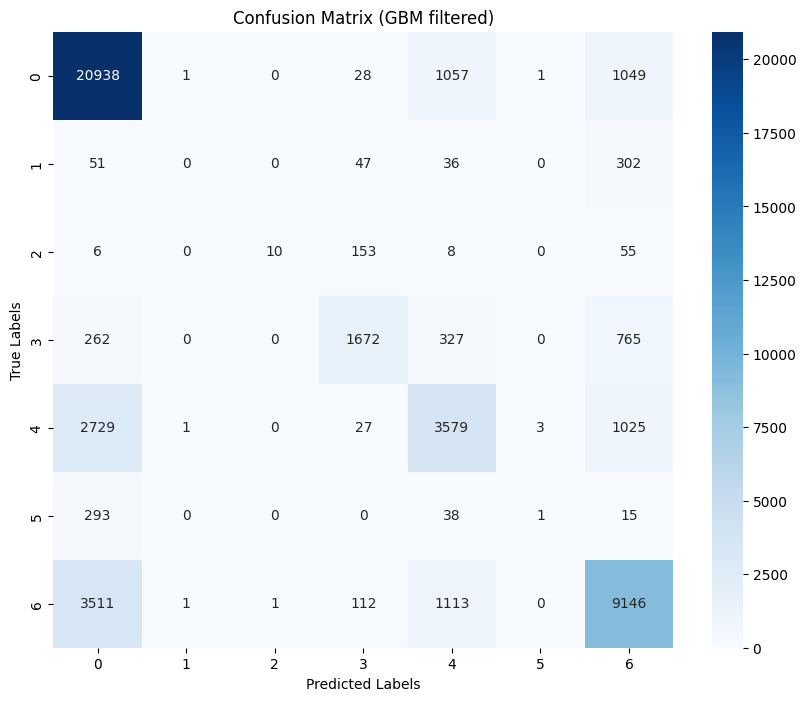

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate and train the Gradient Boosting Classifier
gbm_filtered = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_filtered.fit(X_train_filtered, y_train_filtered)

# Predict on the filtered test data
y_pred_gbm_filtered = gbm_filtered.predict(X_test_filtered)
y_proba_gbm_filtered = gbm_filtered.predict_proba(X_test_filtered)

# Calculate the evaluation metrics using the filtered predictions from GBM
accuracy_gbm_filtered = accuracy_score(y_test_filtered, y_pred_gbm_filtered)
precision_gbm_filtered = precision_score(y_test_filtered, y_pred_gbm_filtered, average='weighted', zero_division=0)
recall_gbm_filtered = recall_score(y_test_filtered, y_pred_gbm_filtered, average='weighted', zero_division=0)
f1_gbm_filtered = f1_score(y_test_filtered, y_pred_gbm_filtered, average='weighted')

# Binarize the output for all classes in the filtered dataset (if not already binarized)
roc_auc_gbm_filtered = roc_auc_score(y_test_binarized_filtered, y_proba_gbm_filtered, multi_class="ovr", average='weighted')

# Print the evaluation metrics for the filtered data
print(f"Accuracy (GBM filtered): {accuracy_gbm_filtered:.2f}")
print(f"Precision (GBM filtered): {precision_gbm_filtered:.2f}")
print(f"Recall (GBM filtered): {recall_gbm_filtered:.2f}")
print(f"F1 Score (GBM filtered): {f1_gbm_filtered:.2f}")
print(f"ROC-AUC Score (GBM filtered): {roc_auc_gbm_filtered:.2f}")

# Print a classification report for detailed metrics using the filtered data
print("\nClassification Report (GBM filtered):\n", classification_report(y_test_filtered, y_pred_gbm_filtered))

# Plot a confusion matrix for the filtered data
conf_matrix_gbm_filtered = confusion_matrix(y_test_filtered, y_pred_gbm_filtered)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_gbm_filtered, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (GBM filtered)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Model 2 with SMOTE

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Assuming 'X' and 'y' are your features and labels, and you have already defined 'X_filtered' and 'y_filtered'
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.3, random_state=42
)

# Now, filter out the classes with very few samples before applying SMOTE
k_neighbors = 5  # or the number of neighbors you want for SMOTE, typically 5
class_counts = y_train_filtered.value_counts()
classes_to_keep = class_counts[class_counts >= k_neighbors + 1].index
filter_mask = y_train_filtered.isin(classes_to_keep)
X_train_filtered_smaller = X_train_filtered[filter_mask]
y_train_filtered_smaller = y_train_filtered[filter_mask]

# Then, apply SMOTE to this filtered training set
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=k_neighbors-1, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_filtered_smaller, y_train_filtered_smaller)

# Continue with training your Gradient Boosting model on the SMOTE-resampled data
gbm_smote = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_smote.fit(X_train_smote, y_train_smote)

# Predict on the original (unfiltered) test data
y_pred_gbm_smote = gbm_smote.predict(X_test_filtered)
y_proba_gbm_smote = gbm_smote.predict_proba(X_test_filtered)

# Binarize the output for all classes in the original dataset
y_test_binarized = label_binarize(y_test_filtered, classes=np.unique(y_train_smote))

# Calculate the evaluation metrics
accuracy_gbm_smote = accuracy_score(y_test_filtered, y_pred_gbm_smote)
precision_gbm_smote = precision_score(y_test_filtered, y_pred_gbm_smote, average='weighted', zero_division=0)
recall_gbm_smote = recall_score(y_test_filtered, y_pred_gbm_smote, average='weighted', zero_division=0)
f1_gbm_smote = f1_score(y_test_filtered, y_pred_gbm_smote, average='weighted')
roc_auc_gbm_smote = roc_auc_score(y_test_binarized, y_proba_gbm_smote, multi_class="ovr", average='weighted')

# Print the evaluation metrics
print(f"Accuracy (GBM SMOTE): {accuracy_gbm_smote:.2f}")
print(f"Precision (GBM SMOTE): {precision_gbm_smote:.2f}")
print(f"Recall (GBM SMOTE): {recall_gbm_smote:.2f}")
print(f"F1 Score (GBM SMOTE): {f1_gbm_smote:.2f}")
print(f"ROC-AUC Score (GBM SMOTE): {roc_auc_gbm_smote:.2f}")

# Print a classification report for detailed metrics
print("\nClassification Report (GBM SMOTE):\n", classification_report(y_test_filtered, y_pred_gbm_smote))

# Plot a confusion matrix
conf_matrix_gbm_smote = confusion_matrix(y_test_filtered, y_pred_gbm_smote)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_gbm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (GBM SMOTE)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

KeyboardInterrupt: 

## **Model 3: Logistic Regression**

### Model 3 Building

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train the logistic regression model
logreg_filtered = LogisticRegression(max_iter=1000, random_state=42)
logreg_filtered.fit(X_train_filtered, y_train_filtered)

# Predict on the filtered test data
y_pred_logreg_filtered = logreg_filtered.predict(X_test_filtered)
y_proba_logreg_filtered = logreg_filtered.predict_proba(X_test_filtered)

# Evaluate the logistic regression model
accuracy_logreg_filtered = accuracy_score(y_test_filtered, y_pred_logreg_filtered)
precision_logreg_filtered = precision_score(y_test_filtered, y_pred_logreg_filtered, average='weighted', zero_division=0)
recall_logreg_filtered = recall_score(y_test_filtered, y_pred_logreg_filtered, average='weighted', zero_division=0)
f1_logreg_filtered = f1_score(y_test_filtered, y_pred_logreg_filtered, average='weighted')
roc_auc_logreg_filtered = roc_auc_score(y_test_binarized_filtered, y_proba_logreg_filtered, multi_class="ovr", average='weighted')

print(f"Accuracy (Logistic Regression filtered): {accuracy_logreg_filtered:.2f}")
print(f"Precision (Logistic Regression filtered): {precision_logreg_filtered:.2f}")
print(f"Recall (Logistic Regression filtered): {recall_logreg_filtered:.2f}")
print(f"F1 Score (Logistic Regression filtered): {f1_logreg_filtered:.2f}")
print(f"ROC-AUC Score (Logistic Regression filtered): {roc_auc_logreg_filtered:.2f}")

# no hyper-parameter tunings
# Accuracy (Logistic Regression filtered): 0.57
# Precision (Logistic Regression filtered): 0.50
# Recall (Logistic Regression filtered): 0.57
# F1 Score (Logistic Regression filtered): 0.51
# ROC-AUC Score (Logistic Regression filtered): 0.76

In [ ]:
# refine the logistic regression model
# 1. increase the max_iter as part of hyper-parameter tunings

from sklearn.linear_model import LogisticRegression

# Instantiate and train the logistic regression model
logreg_filtered = LogisticRegression(max_iter=5000, random_state=42)
logreg_filtered.fit(X_train_filtered, y_train_filtered)

# Predict on the filtered test data
y_pred_logreg_filtered = logreg_filtered.predict(X_test_filtered)
y_proba_logreg_filtered = logreg_filtered.predict_proba(X_test_filtered)

# Evaluate the logistic regression model
accuracy_logreg_filtered = accuracy_score(y_test_filtered, y_pred_logreg_filtered)
precision_logreg_filtered = precision_score(y_test_filtered, y_pred_logreg_filtered, average='weighted', zero_division=0)
recall_logreg_filtered = recall_score(y_test_filtered, y_pred_logreg_filtered, average='weighted', zero_division=0)
f1_logreg_filtered = f1_score(y_test_filtered, y_pred_logreg_filtered, average='weighted')
roc_auc_logreg_filtered = roc_auc_score(y_test_binarized_filtered, y_proba_logreg_filtered, multi_class="ovr", average='weighted')

print(f"Accuracy (Logistic Regression filtered): {accuracy_logreg_filtered:.2f}")
print(f"Precision (Logistic Regression filtered): {precision_logreg_filtered:.2f}")
print(f"Recall (Logistic Regression filtered): {recall_logreg_filtered:.2f}")
print(f"F1 Score (Logistic Regression filtered): {f1_logreg_filtered:.2f}")
print(f"ROC-AUC Score (Logistic Regression filtered): {roc_auc_logreg_filtered:.2f}")

# hyper-parameter tunings: increase max_iter to 5,000
# Accuracy (Logistic Regression filtered): 0.68
# Precision (Logistic Regression filtered): 0.65
# Recall (Logistic Regression filtered): 0.68
# F1 Score (Logistic Regression filtered): 0.65
# ROC-AUC Score (Logistic Regression filtered): 0.83

In [ ]:
# refine the logistic regression model
# 1. increase the max_iter as part of hyper-parameter tunings
# 2. can scale the features to optimize the algorithm convergence

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Scaling the features
scaler = StandardScaler()
X_train_filtered_scaled = scaler.fit_transform(X_train_filtered)
X_test_filtered_scaled = scaler.transform(X_test_filtered)

# Instantiate and train the logistic regression model with increased max_iter
logreg_filtered = LogisticRegression(max_iter=5000, random_state=42)
logreg_filtered.fit(X_train_filtered_scaled, y_train_filtered)

# Predict on the scaled filtered test data
y_pred_logreg_filtered = logreg_filtered.predict(X_test_filtered_scaled)
y_proba_logreg_filtered = logreg_filtered.predict_proba(X_test_filtered_scaled)

# Evaluate the logistic regression model using scaled data
accuracy_logreg_filtered = accuracy_score(y_test_filtered, y_pred_logreg_filtered)
precision_logreg_filtered = precision_score(y_test_filtered, y_pred_logreg_filtered, average='weighted', zero_division=0)
recall_logreg_filtered = recall_score(y_test_filtered, y_pred_logreg_filtered, average='weighted', zero_division=0)
f1_logreg_filtered = f1_score(y_test_filtered, y_pred_logreg_filtered, average='weighted')
roc_auc_logreg_filtered = roc_auc_score(y_test_binarized_filtered, y_proba_logreg_filtered, multi_class="ovr", average='weighted')

# Print the evaluation metrics for the scaled logistic regression model
print(f"Accuracy (Logistic Regression filtered and scaled): {accuracy_logreg_filtered:.2f}")
print(f"Precision (Logistic Regression filtered and scaled): {precision_logreg_filtered:.2f}")
print(f"Recall (Logistic Regression filtered and scaled): {recall_logreg_filtered:.2f}")
print(f"F1 Score (Logistic Regression filtered and scaled): {f1_logreg_filtered:.2f}")
print(f"ROC-AUC Score (Logistic Regression filtered and scaled): {roc_auc_logreg_filtered:.2f}")

# hyper-parameter tunings: increase max_iter to 5,000 and scale the features
# Accuracy (Logistic Regression filtered and scaled): 0.69
# Precision (Logistic Regression filtered and scaled): 0.66
# Recall (Logistic Regression filtered and scaled): 0.69
# F1 Score (Logistic Regression filtered and scaled): 0.66
# ROC-AUC Score (Logistic Regression filtered and scaled): 0.86

## **Model 4: Support Vector Machines**

### Model 4 Building

In [ ]:
'''
# it takes 44 minutes to run - the model evaluation can be seen at the bottom of this cell

from sklearn.svm import SVC

# Instantiate and train the SVM classifier
svm_filtered = SVC(kernel='linear', probability=True, random_state=42)
svm_filtered.fit(X_train_filtered, y_train_filtered)

# Predict on the filtered test data
y_pred_svm_filtered = svm_filtered.predict(X_test_filtered)
y_proba_svm_filtered = svm_filtered.predict_proba(X_test_filtered)

# Evaluate the SVM model
accuracy_svm_filtered = accuracy_score(y_test_filtered, y_pred_svm_filtered)
precision_svm_filtered = precision_score(y_test_filtered, y_pred_svm_filtered, average='weighted', zero_division=0)
recall_svm_filtered = recall_score(y_test_filtered, y_pred_svm_filtered, average='weighted', zero_division=0)
f1_svm_filtered = f1_score(y_test_filtered, y_pred_svm_filtered, average='weighted')
roc_auc_svm_filtered = roc_auc_score(y_test_binarized_filtered, y_proba_svm_filtered, multi_class="ovr", average='weighted')

print(f"Accuracy (SVM filtered): {accuracy_svm_filtered:.2f}")
print(f"Precision (SVM filtered): {precision_svm_filtered:.2f}")
print(f"Recall (SVM filtered): {recall_svm_filtered:.2f}")
print(f"F1 Score (SVM filtered): {f1_svm_filtered:.2f}")
print(f"ROC-AUC Score (SVM filtered): {roc_auc_svm_filtered:.2f}")

# Accuracy (SVM filtered): 0.51
# Precision (SVM filtered): 0.28
# Recall (SVM filtered): 0.51
# F1 Score (SVM filtered): 0.35
# ROC-AUC Score (SVM filtered): 0.60
'''

'''
from sklearn.svm import SVC

# Instantiate and train the SVM classifier
svm_filtered = SVC(kernel='linear', probability=True, random_state=42)
svm_filtered.fit(X_train_filtered, y_train_filtered)

# Predict on the filtered test data
y_pred_svm_filtered = svm_filtered.predict(X_test_filtered)
y_proba_svm_filtered = svm_filtered.predict_proba(X_test_filtered)

# Evaluate the SVM model
accuracy_svm_filtered = accuracy_score(y_test_filtered, y_pred_svm_filtered)
precision_svm_filtered = precision_score(y_test_filtered, y_pred_svm_filtered, average='weighted', zero_division=0)
recall_svm_filtered = recall_score(y_test_filtered, y_pred_svm_filtered, average='weighted', zero_division=0)
f1_svm_filtered = f1_score(y_test_filtered, y_pred_svm_filtered, average='weighted')
roc_auc_svm_filtered = roc_auc_score(y_test_binarized_filtered, y_proba_svm_filtered, multi_class="ovr", average='weighted')

print(f"Accuracy (SVM filtered): {accuracy_svm_filtered:.2f}")
print(f"Precision (SVM filtered): {precision_svm_filtered:.2f}")
print(f"Recall (SVM filtered): {recall_svm_filtered:.2f}")
print(f"F1 Score (SVM filtered): {f1_svm_filtered:.2f}")
print(f"ROC-AUC Score (SVM filtered): {roc_auc_svm_filtered:.2f}")
'''